<center><font size = "8">Passive and Active membrane Properties<center>

<font size=4><font color=blue> In this notebook you will learn:
<ul style="color: blue; font-size: 18px;">
    <li> the differences between passive and active membrane properties and how this affects the signal propagation along the dendrites</li>
</ul>

<p style="color: red; font-size: 16px;"><b>IMPORTANT:</b> this notebook is using <b>Python</b> code to help you load, visualize and analyze the morphologies.</p>
<ul style="color: red; font-size: 16px;">
  <li><b>YOU DON'T NEED TO KNOW HOW TO CODE!</b> (you will learn to code in future courses)</li>
  <li>YOU WOULD ONLY RUN THE CELLS. To run the cells: </li>
    <ul style="color: red; font-size: 16px;">
        <li>Click once on one of the cells, you will notice that it is sellected because it is highlighted in blue.</li>
        <li>Press "Command+enter" or click on the Run (triangle) button at the top of the page.</li>
        <li>Consider that cells <b>must be run by order</b> </li>
    </ul>
</ul>

<p style="color: green; font-size: 16px;"><b>YOUR GOAL:</b></p>
<ul style="color: green; font-size: 16px;">
  <li>Answer the questions that you would find along the notebook. For that you would have to ...... Build a report with your answeres and conclussions.</li>
</ul>

## 1. Passive and active membrane properties

<font size="4">
    
__What are passive and active membrane properties?:__ 

- __Passive__ membrane properties are characteristics of a neuronal membrane, such as membrane resistance, membrane capacitance, and axial resistance, that do not depend on voltage-gated ion channels or receptors but are instead related to ion leakage channels, pumps, and the cell's physical structure. These properties influence how the membrane conducts electrical signals by affecting the efficiency of signal propagation, the speed of potential changes, and the integration of synaptic inputs. (You can know more about passive properties in the following [link](https://www.scientifica.uk.com/learning-zone/passive-membrane-properties))

- __Active__ membrane properties depend on the activation of voltage gated ion channels. Unlike passive properties, active properties allow the neuron to generate and regulate action potentials, amplify or dampen inputs, and produce nonlinear responses.

- This can be represented (modeled) as an RC circuit, with resistance and capacitance connected in parallel. Passive properties involve components that store, dissipate, or filter energy, such as resistors, capacitors, and inductors, and do not require an external power source to operate. For example, the lipid bylayer of the membrane acts as a capacitance with channels that allow the ions to pass through with certain resistance (membrane resistivity). In case of axons and dendrites, the intracelular axial resistance is a passive membrane property. This property leads to decay of the membrane potential in a distance dependent manner, starting from  the stimulation point. In contrast, active properties are associated with components that require an external power supply to amplify, generate, or control energy in the form of voltage or current, with examples including voltage/current sources and transistors. 

<center><img src="equivalent_circuit.png" width="700"><center>

## 1.1 Signal attenuation due to passive membrane properties: 
## using a toy neuronal model: soma, 1 dendrite and 1 axon

In [1]:
# First call all the usefull packages
%matplotlib inline

from neuron import h
import matplotlib.pyplot as plt
import numpy as np
import math as m
import neurom as nm
from neurom import view
from hoc2swc import neuron2swc
import UsefulFunctions as UF

import ipywidgets as widgets
from IPython.display import display, clear_output

from passive_neuron_1dend import PassiveNeuron_1Dend
from passive_neuron_1d_3d import PassiveNeuron_1D_3D
from active_neuron_1d_3d import ActiveNeuron_1D_3D

--No graphics will be displayed.



|-|       soma(0-1)
   `----|       dend(0-1)
 `----|       axon(0-1)

Wrote cell 0 to cell_01.swc


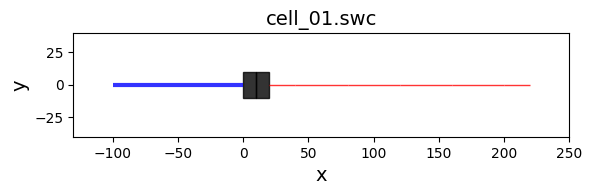

In [2]:
cell_pass_1d = PassiveNeuron_1Dend()

# Plot morphology so far
UF.plot_morphology("cell_01")

<font size=4> In this very simple and NON REALISTIC model:

<ul style="color: black; font-size: 18px;">
    <li> the soma is represented as a black square of 20x20 µm</li>
    <li> the axon (blue line) is defined by the following parameters: 
        <ul><li> diam = 3 µm </li></ul>
        <ul><li> length = 100 µm </li></ul>
        <ul><li> axial resistance = 123.0 Ω*cm </li></ul>
        <ul><li> capacitance = 1 µF/cm^2 </li></ul>
    <li> the dendrite (red line) is defined by the following parameters:</li>
        <ul><li> diam = 1 µm </li></ul>
        <ul><li> length = 200 µm </li></ul>
        <ul><li> axial resistance = 300.0 Ω*cm </li></ul>
        <ul><li> capacitance = 1 µF/cm^2 </li></ul>
</ul>  

<font size=3>*Note: if you are curious about how this neurons has been coded in python, check the file "passive_neuron_1dend.py"

### Now we are going to see how the signal propagates into the soma from three different stimulation points in the dendrite.

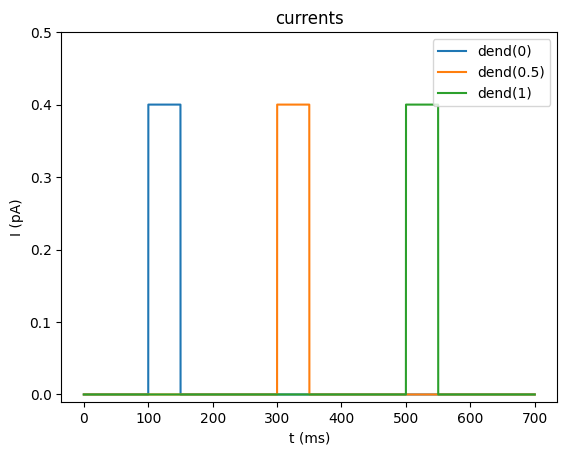

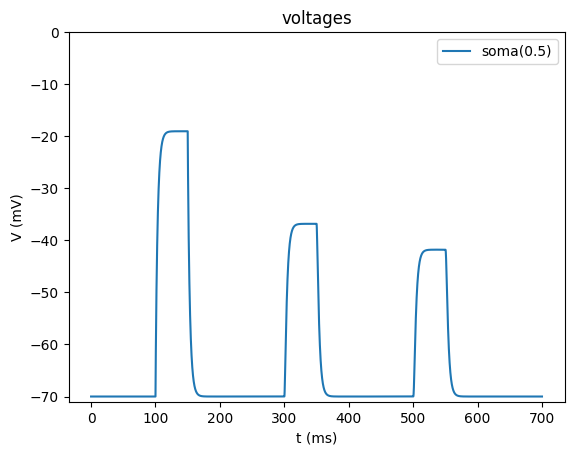

In [3]:
UF.reset()

# Scan at different locations with different delays
delays = np.arange(100, 600, 200)
locations = np.linspace(0, 1, 3)

# Setup stimulations and recordings
for p in zip(locations, delays):
    UF.iclamp(cell_pass_1d.dend(p[0]), amplitude=0.4, delay=p[1], duration=50)
UF.record_voltage(cell_pass_1d.soma(0.5))

# Simulate and plot
v_init = -70
t_stop = 700
UF.tvi_plots(UF.init_run(v_init, t_stop), UF.voltage_records, UF.current_records, vmax=0)

<font size=4>You can see that the signal recording at the soma (voltages) is larger for the dendritic stimulation closer to it (dend(0)), while is smaller for the fardest dendritic stimulation (dend(1)). Just due to the physical properties of the neuron.

### Let's see what would happen if we stimulate at the soma and record at different points the dendrite

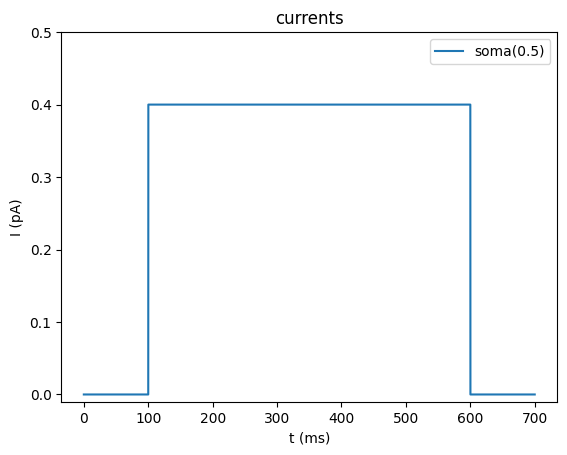

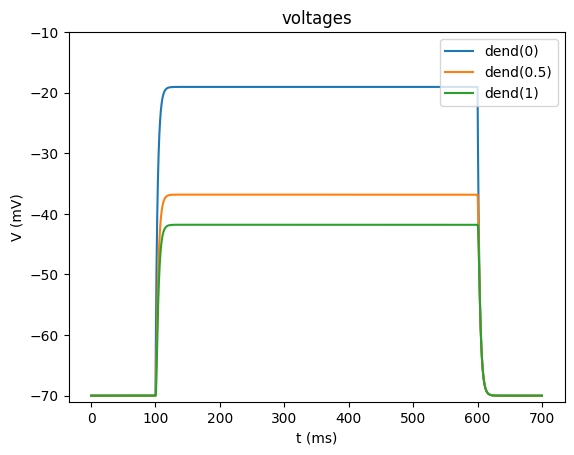

In [4]:
UF.reset()

# Scan at different locations with different delays
locations = np.linspace(0, 1, 3)

# Setup stimulations and recordings
UF.iclamp(cell_pass_1d.soma(0.5), amplitude=0.4)
for p in locations:
    UF.record_voltage(cell_pass_1d.dend(p))

# Simulate and plot
v_init = -70
t_stop = 700
UF.tvi_plots(UF.init_run(v_init, t_stop), UF.voltage_records, UF.current_records, vmax=-10)

## INTERACTIVE:
### Play around with the following passive parameters and observe how the voltage changes along the dendrite:
    - dendritic diamater
    - dendritic axial resistance
    - dendritic capacitance

In [5]:
UF.chage_passive_prop(cell_pass_1d)

## 1.2 Signal attenuation due to passive membrane properties: 
## using a toy neuronal model: soma, 3 dendrites with different diametres and 1 axon

In [ ]:
cell_pass_1d_3d = PassiveNeuron_1D_3D()

# Plot morphology so far
UF.plot_morphology("cell_02")

### As we did before we will stimulate at the final end of each dendrite and record the voltage signal at the soma

In [ ]:
UF.reset()

branchlst = [cell_pass_1d_3d.branch_0, cell_pass_1d_3d.branch_1, cell_pass_1d_3d.branch_2, cell_pass_1d_3d.branch_3]

# Setup stimulations and recordings
for idx, branch in enumerate(branchlst):
    UF.iclamp(branch(0.5), amplitude=0.4, delay=200 + idx * 100, duration=50)
UF.record_voltage(cell_pass_1d_3d.soma(0.5))

# Simulate and plot
v_init = -70
t_stop = 700
UF.tvi_plots(UF.init_run(v_init, t_stop), UF.voltage_records, UF.current_records, vmax=-65)

### As before we will stimulate at the soma and record at the end of each dendrite

In [ ]:
UF.reset()

# Setup stimulations and recordings
UF.iclamp(cell_pass_1d_3d.soma(0.5), amplitude=0.4)
for branch in branchlst:
    UF.record_voltage(branch(1))

# Simulate and plot
v_init = -70
t_stop = 700
UF.tvi_plots(UF.init_run(v_init, t_stop), UF.voltage_records, UF.current_records, vmax=-66)

## 1.3 Active properties.  
## We will perform the same experiments but including active properties at the soma and the dendrites

In [ ]:
# Firts we load the neuron with active properties:

cell_active_1d_3d = ActiveNeuron_1D_3D()

# Plot morphology so far
UF.plot_morphology("cell_02")

# Back-propagating action potential.

<font size=4>Coincident inputs to all dendritic branches, will trigger an AP at the soma. We can see how this change in somatic potential propagates back to the dendrites.

In [ ]:
UF.reset()

branchlst = [cell_active_1d_3d.branch_0, cell_active_1d_3d.branch_1, cell_active_1d_3d.branch_2, cell_active_1d_3d.branch_3]

# Setup stimulations and recordings
for branch in branchlst:
    UF.iclamp(branch(1), amplitude=0.5, delay=100, duration=50)

UF.record_voltage(cell_active_1d_3d.soma(0.5))
UF.record_voltage(cell_active_1d_3d.dend(0.5))

# Simulate and plot
v_init = -70
t_stop = 700
UF.tvi_plots(UF.init_run(v_init, t_stop), UF.voltage_records, UF.current_records, vmax=60, imax=1)

#### QUESTIONS

- Que relaciones ves entre la propagacion de la señal y las propiedades pasivas: diametro, Ra y Cm
- Con lo que has aprendido en el curso y esta practica, discute como seria la activacion de una neurona con dendritas de mayor diametro? Busca en la plataforma y calcula el diametro medio de .... en comparacion con .... (Para mi) busca 2 neuronas y muestra que con el mismo estimulo cual seria mas facil de activar, solo considerando las propiedades pasivas.
- Respecto a las propiedades activas, hablar de la conductancia y poner datos de dos neuronas. La pregunta, sabiendo la conductacia con el mismo estimulo cual crees que necesitara mas inyeccion de corriente para generar un PA.